# Chemprop
# Jupyter Notebook with Anaconda 2020.11

**Tutorial by Kevin P. Greenman (Ph.D. Candidate, MIT Department of Chemical Engineering)**

This notebook is a tutorial that demonstrates how to use the Python interface of Chemprop, a package for molecular property prediction using directed message-passing neural networks (d-MPNNs). The source code of Chemprop is available on [GitHub](https://github.com/chemprop/chemprop), and a [Read the Docs page](https://chemprop.readthedocs.io/en/latest/) is also available with the full documentation. The GitHub repo contains instructions for installing Chemprop on a local machine, either from source or from PyPi using `pip`.

# Acknowledgements

Chemprop was first described in the following [paper](https://doi.org/10.1021/acs.jcim.9b00237):

```
Yang K, Swanson K, Jin W, Coley C, Eiden P, Gao H, Guzman-Perez A, Hopper T, Kelley B, Mathea M, Palmer A. Analyzing learned molecular representations for property prediction. Journal of chemical information and modeling. 2019 Jul 30; 59(8):3370-88. DOI: 10.1021/acs.jcim.9b00237.
```

Numerous researchers at MIT and in the open-source community have contributed to Chemprop to expand its functionality since then. In particular, I acknowledge the work of Lior Hirschfeld, Charles McGill, Esther Heid, Florence Vermeire, Max Liu, David Graff, Oscar Wu, Yunsie Chung, Yanfei Guan, Michael Forsuelo, and Gabriele Scalia. The PIs associated with this work include Regina Barzilay, Tommi Jaakkola, Klavs Jensen, Connor Coley, William Green, and Rafael Gómez-Bombarelli. The development of Chemprop is funded largely by the [Machine Learning for Pharmaceutical Discovery and Synthesis (MLPDS) Consortium](https://mlpds.mit.edu/).

# Applications

Chemprop has been applied in many subsequent publications, e.g.:
* [A Deep Learning Approach to Antibiotic Discovery](https://doi.org/10.1016/j.cell.2020.01.021)
* [Machine Learning of Reaction Properties via Learned Representations of the Condensed Graph of Reaction](https://doi.org/10.1021/acs.jcim.1c00975)
* [Predicting Infrared Spectra with Message Passing Neural Networks](https://doi.org/10.1021/acs.jcim.1c00055)
* [Group Contribution and Machine Learning Approaches to Predict Abraham Solute Parameters, Solvation Free Energy, and Solvation Enthalpy](https://doi.org/10.1021/acs.jcim.1c01103)
* [Multi-fidelity prediction of molecular optical peaks with deep learning](https://doi.org/10.1039/D1SC05677H)

In [1]:
# !jupyter notebook --version
# !python --version
# import tensorflow as tf
# print(tf.__version__)
# import sklearn
# print(sklearn.__version__)
# import keras
# print(keras.__version__)
# import pandas as pd
# print(pd.__version__)
###################################################################
# https://nanohub.org/tools/chempropdemo
# 6.4.0
# Python 3.8.10
# 2.2.0
# 0.24.2
# 2.4.3
# 1.2.4
###################################################################
###################################################################
#https://nanohub.org/tools/jupyter70
#Jupyter Notebook with Anaconda 2020.11
# 6.4.0
# Python 3.8.10
# 2.2.0
# 1.0.2
# 2.4.3
# 1.2.4
#6.4.0, Python 3.8.10,tf 2.2.0, sklearn 0.24.1, keras 2.4.3 pd 1.2.4
###################################################################
# import chemprop
# print(chemprop.__version__)
# # 1.4.1

# Setup

In [47]:
import os
import chemprop
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA

In [48]:
def plot_parity(y_true, y_pred, y_pred_unc=None):
    
    axmin = min(min(y_true), min(y_pred)) - 0.1*(max(y_true)-min(y_true))
    axmax = max(max(y_true), max(y_pred)) + 0.1*(max(y_true)-min(y_true))
    
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    
    plt.plot([axmin, axmax], [axmin, axmax], '--k')

    plt.errorbar(y_true, y_pred, yerr=y_pred_unc, linewidth=0, marker='o', markeredgecolor='w', alpha=1, elinewidth=1)
    
    plt.xlim((axmin, axmax))
    plt.ylim((axmin, axmax))
    
    ax = plt.gca()
    ax.set_aspect('equal')
    
    at = AnchoredText(
    f"MAE = {mae:.2f}\nRMSE = {rmse:.2f}", prop=dict(size=10), frameon=True, loc='upper left')
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)
    
    plt.xlabel('True')
    plt.ylabel('Chemprop Predicted')
    
    plt.show()
    
    return

# Train regression model

In [52]:
arguments = [
    '--data_path', '../data/regression.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'test_checkpoints_reg',
    '--save_smiles_splits',
    '--epochs', '30',
#     '--adding_h', 'False',
#     '--activation', 'ReLU', #['ReLU', 'LeakyReLU', 'PReLU', 'tanh', 'SELU', 'ELU']
#     '--metric', 'rmse', #['rmse', 'mae', 'mse', 'r2', 'bounded_rmse', 'bounded_mae', 'bounded_mse']
#     '--aggregation', 'mean',
#     '--aggregation_norm', '100',
#     '--alternative_loss_function', 'None', 
#     '--batch_size', '50',
#     '--depth', '3',
#     '--dropout','0.0',
#     '--ensemble_size', '1', 
#     '--ffn_hidden_size', '300', 
#     '--ffn_num_layers', '2', 
#     '--final_lr',  '0.0001', 
#     '--frzn_ffn_layers', '0', 
#     '--hidden_size', '300', 
#     '--ignore_columns', 'None', 
#     '--init_lr', '0.0001', 
#     '--log_frequency', '10', 
#     '--max_data_size', 'None', 
#     '--max_lr', '0.001', 
#     '--num_folds', '1', 
#     '--num_lrs', '1', 
#     '--num_tasks', '1', 
#     '--num_workers', '8', 
#     '--smiles_columns',  ['smiles'], 
#     '--split_sizes', '(0.8, 0.1, 0.1)', 
#     '--split_type', 'random', 
#     '--target_columns', 'None', 
#     '--target_weights', 'None', 
#     '--task_names', ['logSolubility'], 
]

# from chemprop.features import get_available_features_generators

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

Command line
python /apps/share64/debian10/anaconda/anaconda-7/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/nanohub/bbishnoi/.local/share/jupyter/runtime/kernel-144bb3b1-09c8-49df-a882-eff23c0ec22e.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'alternative_loss_function': None,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': '../data/regression.csv',
 'data_weights_path': None,
 'datas


 75%|███████▌  | 6/8 [00:00<00:00, 21.71it/s]Loss = 1.5705e-01, PNorm = 34.2904, GNorm = 1.8793, lr_0 = 5.1265e-04

                                             
  0%|          | 0/1 [00:00<?, ?it/s]
                                     Validation rmse = 0.877661
 33%|███▎      | 10/30 [00:05<00:11,  1.75it/s]Epoch 10

 75%|███████▌  | 6/8 [00:00<00:00, 21.36it/s]
                                             
  0%|          | 0/1 [00:00<?, ?it/s]
                                     Validation rmse = 0.836403
 37%|███▋      | 11/30 [00:06<00:10,  1.79it/s]Epoch 11

  0%|          | 0/8 [00:00<?, ?it/s]Loss = 1.3103e-01, PNorm = 34.3121, GNorm = 0.5959, lr_0 = 4.6257e-04

 75%|███████▌  | 6/8 [00:00<00:00, 20.36it/s]
                                             
  0%|          | 0/1 [00:00<?, ?it/s]
                                     Validation rmse = 0.832724
 40%|████      | 12/30 [00:06<00:09,  1.80it/s]Epoch 12

 38%|███▊      | 3/8 [00:00<00:00, 22.77it/s]Loss = 1.4850e-01, PNor

                                             
  0%|          | 0/1 [00:00<?, ?it/s]
                                     Validation rmse = 0.710885
 93%|█████████▎| 28/30 [00:15<00:01,  1.93it/s]Epoch 28

 50%|█████     | 4/8 [00:00<00:00, 18.27it/s]Loss = 7.5084e-02, PNorm = 34.4543, GNorm = 1.3873, lr_0 = 1.0969e-04

100%|██████████| 8/8 [00:00<00:00, 18.08it/s]
                                             
  0%|          | 0/1 [00:00<?, ?it/s]
                                     Validation rmse = 0.735634
 97%|█████████▋| 29/30 [00:15<00:00,  1.95it/s]Epoch 29

 75%|███████▌  | 6/8 [00:00<00:00, 16.62it/s]Loss = 7.5050e-02, PNorm = 34.4586, GNorm = 2.2624, lr_0 = 1.0000e-04

100%|██████████| 8/8 [00:00<00:00, 17.20it/s]
                                             
  0%|          | 0/1 [00:00<?, ?it/s]
                                     Validation rmse = 0.691854
100%|██████████| 30/30 [00:16<00:00,  1.83it/s]
Model 0 best validation rmse = 0.691854 on epoch 29
Loading pretrained

# Predict from file

In [53]:
arguments = [
    '--test_path', 'test_checkpoints_reg/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_reg.csv',
    '--checkpoint_dir', 'test_checkpoints_reg'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args


50it [00:00, 104805.20it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 50
Predicting with an ensemble of 1 models
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

Saving predictions to test_preds_reg.csv
Elapsed time = 0:00:01


In [6]:
df = pd.read_csv('test_checkpoints_reg/fold_0/test_full.csv')
df['preds'] = [x[0] for x in preds]
df

,smiles,logSolubility,preds
0,C/C1CCC(\C)CC1,-4.470,-2.914306
1,Cc1ccc(OP(=O)(Oc2cccc(C)c2)Oc3ccccc3C)cc1,-6.010,-2.814409
2,c1c(Br)ccc2ccccc12,-4.400,-4.291570
3,CCOc1ccc(cc1)C(C)(C)COCc3cccc(Oc2ccccc2)c3,-8.600,-3.216173
4,CCC1(C(=O)NC(=O)NC1=O)C2=CCCCC2,-2.170,-2.963616
5,C(Cc1ccccc1)c2ccccc2,-4.620,-2.542809
6,Cc1cccc(N)c1,-0.850,-1.941072
7,CCN(CC(C)=C)c1c(cc(cc1N(=O)=O)C(F)(F)F)N(=O)=O,-6.124,-4.105512
8,CC(C)O,0.430,0.155455
9,CCCCCCCCO,-2.390,-3.124297


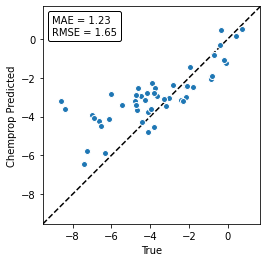

In [7]:
plot_parity(df.logSolubility, df.preds)

# Predict from SMILES list

In [8]:
smiles = [['CCC'], ['CCCC'], ['OCC']]
arguments = [
    '--test_path', '/dev/null',
    '--preds_path', '/dev/null',
    '--checkpoint_dir', 'test_checkpoints_reg'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args, smiles=smiles)

Loading training args


  0%|          | 0/1 [00:00<?, ?it/s]

Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 3
Predicting with an ensemble of 1 models
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Saving predictions to /dev/null
Elapsed time = 0:00:01


# Load model once, predict multiple times

In [9]:
arguments = [
    '--test_path', '/dev/null',
    '--preds_path', '/dev/null',
    '--checkpoint_dir', 'test_checkpoints_reg'
]

args = chemprop.args.PredictArgs().parse_args(arguments)

model_objects = chemprop.train.load_model(args=args)

smiles = [['CCC'], ['CCCC'], ['OCC']]
preds = chemprop.train.make_predictions(args=args, smiles=smiles, model_objects=model_objects)

smiles = [['CCCC'], ['CCCCC'], ['COCC']]
preds = chemprop.train.make_predictions(args=args, smiles=smiles, model_objects=model_objects)

Loading training args


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 3
Predicting with an ensemble of 1 models



  0%|          | 0/1 [00:00<?, ?it/s]

Saving predictions to /dev/null
Elapsed time = 0:00:00
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 3
Predicting with an ensemble of 1 models



100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

Saving predictions to /dev/null
Elapsed time = 0:00:00


# Reactions

In [10]:
reaction_reg_df = pd.read_csv('../data/reaction_regression.csv')
reaction_reg_df

,AAM,ea
0,[O:1]([C:2]([C:3]([C:4](=[O:5])[C:6]([O:7][H:1...,8.898934
1,[C:1]1([H:8])([H:9])[O:2][C@@:3]2([H:10])[C@@:...,5.464328
2,[C:1]([C@@:2]1([H:11])[C@@:3]2([H:12])[C:4]([H...,5.270552
3,[C:1]([O:2][C:3]([C@@:4]([C:5]([H:14])([H:15])...,8.473006
4,[C:1]([C:2]#[C:3][C:4]([C:5](=[O:6])[H:12])([H...,5.579037
...,...,...
495,[C:1]([c:2]1[c:3]([H:10])[n:4]([H:11])[n:5][c:...,14.662005
496,[C:1]([C@@:2]1([H:11])[N:3]([H:12])[C@:4]1([C:...,5.146017
497,[C:1]([C@@:2]1([H:10])[C:3]([H:11])([H:12])[C:...,8.362688
498,[C:1]([c:2]1[c:3]([H:11])[o:4][c:5]([O:6][H:12...,12.416359


In [11]:
arguments = [
    '--data_path', '../data/reaction_regression.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'test_checkpoints_reaction',
    '--epochs', '5',
    '--reaction',
    '--save_smiles_splits'
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

Command line
python /apps/share64/debian10/anaconda/anaconda-7/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/nanohub/bbishnoi/.local/share/jupyter/runtime/kernel-144bb3b1-09c8-49df-a882-eff23c0ec22e.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'alternative_loss_function': None,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': '../data/examples/reaction_regression.csv',
 'data_weights_pa

In [12]:
arguments = [
    '--test_path', 'test_checkpoints_reaction/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_reaction.csv',
    '--checkpoint_dir', 'test_checkpoints_reaction'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args


50it [00:00, 83919.65it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 50
Predicting with an ensemble of 1 models
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

Saving predictions to test_preds_reaction.csv
Elapsed time = 0:00:01


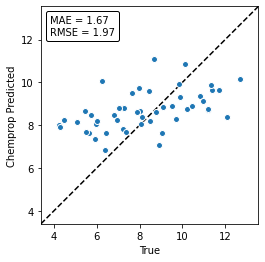

In [13]:
df = pd.read_csv('test_checkpoints_reaction/fold_0/test_full.csv')
df['preds'] = [x[0] for x in preds]

plot_parity(df.ea, df.preds)

# Multiple-Molecule Inputs

In [14]:
multimolecule_df = pd.read_csv('../data/classification_multimolecule.csv')
multimolecule_df

,mol a smiles,mol b Smiles,synergy
0,CC(C)CC1C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NCCC(C(=O...,CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C...,1
1,CCC(C)CCCC(=O)NC(CCN)C(=O)NC(C(C)O)C(=O)NC(CCN...,CC(C1CCC(C(O1)OC2C(CC(C(C2O)OC3C(C(C(CO3)(C)O)...,0
2,CCC(C)CCCC(=O)NC(CCN)C(=O)NC(C(C)O)C(=O)NC(CCN...,CC(C)(C(=O)O)ON=C(C1=CSC(=N1)N)C(=O)NC2C3N(C2=...,0
3,CCC(C)CCCC(=O)NC(CCN)C(=O)NC(C(C)O)C(=O)NC(CCN...,CC(C)(C)NCC(=O)NC1=CC(=C2CC3CC4C(C(=O)C(=C(C4(...,1
4,C[C@H]([C@H]1C(=O)NCC[C@@H](C(=O)N[C@H](C(=O)N...,CN1C(=NC(=O)C(=O)N1)SCC2=C(N3C(C(C3=O)NC(=O)C(...,1
...,...,...,...
254,CC(C)CC1C(=O)NC(C(=O)N2CCCC2C(=O)NC(C(=O)NC(C(...,[N+](=O)([O-])[O-].[Ag+],0
255,CCC(C)CCCC(=O)NC(CCN)C(=O)NC(C(C)O)C(=O)NC(CCN...,C1=CC=C2C(=C1)C=CN2,1
256,CC(C)CC1C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NCCC(C(=O...,CC1C2C(C(=O)N2C(=C1SC3CC(NC3)C(=O)N(C)C)C(=O)O...,1
257,CCOP(=O)(O)OP(=O)(O)O,C1=CC(=CC=C1C(C(CO)NC(=O)C(Cl)Cl)O)[N+](=O)[O-],1


In [15]:
arguments = [
    '--data_path', '../data/classification_multimolecule.csv',
    '--dataset_type', 'classification',
    '--save_dir', 'test_checkpoints_multimolecule',
    '--epochs', '5',
    '--save_smiles_splits',
    '--number_of_molecules', '2',
    '--split_key_molecule', '1' # defaults to 0 (1st column) if not specified
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

Command line
python /apps/share64/debian10/anaconda/anaconda-7/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/nanohub/bbishnoi/.local/share/jupyter/runtime/kernel-144bb3b1-09c8-49df-a882-eff23c0ec22e.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'alternative_loss_function': None,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': '../data/examples/classification_multimolecule.csv',
 'data_w

1-fold cross validation
	Seed 0 ==> test auc = 0.709091
Overall test auc = 0.709091 +/- 0.000000
Elapsed time = 0:00:07


In [16]:
arguments = [
    '--test_path', 'test_checkpoints_multimolecule/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_multimolecule.csv',
    '--checkpoint_dir', 'test_checkpoints_multimolecule',
    '--number_of_molecules', '2',
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args


26it [00:00, 64527.75it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 26
Predicting with an ensemble of 1 models



  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "encoder.encoder.1.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.1.W_i.weight".
Loading pretrained parameter "encoder.encoder.1.W_h.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

Saving predictions to test_preds_multimolecule.csv
Elapsed time = 0:00:01


# Split Type

In [17]:
arguments = [
    '--data_path', '../data/regression.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'test_checkpoints_splits',
    '--epochs', '5',
    '--split_type', 'scaffold_balanced',
    '--save_smiles_splits'
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

Command line
python /apps/share64/debian10/anaconda/anaconda-7/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/nanohub/bbishnoi/.local/share/jupyter/runtime/kernel-144bb3b1-09c8-49df-a882-eff23c0ec22e.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'alternative_loss_function': None,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': '../data/examples/regression.csv',
 'data_weights_path': None

In [18]:
arguments = [
    '--test_path', 'test_checkpoints_splits/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_splits.csv',
    '--checkpoint_dir', 'test_checkpoints_splits',
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args


50it [00:00, 102300.10it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 50
Predicting with an ensemble of 1 models
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

Saving predictions to test_preds_splits.csv
Elapsed time = 0:00:01


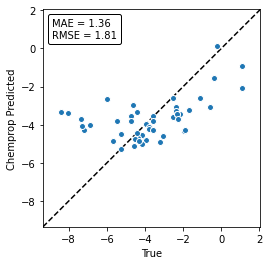

In [19]:
df = pd.read_csv('test_checkpoints_splits/fold_0/test_full.csv')
df['preds'] = [x[0] for x in preds]

plot_parity(df.logSolubility, df.preds)

# Ensembling and Uncertainty

In [20]:
arguments = [
    '--data_path', '../data/reaction_regression.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'test_checkpoints_ensemble',
    '--epochs', '5',
    '--reaction',
    '--save_smiles_splits',
    '--ensemble_size', '5',
    '--split_type', 'scaffold_balanced'
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

Command line
python /apps/share64/debian10/anaconda/anaconda-7/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/nanohub/bbishnoi/.local/share/jupyter/runtime/kernel-144bb3b1-09c8-49df-a882-eff23c0ec22e.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'alternative_loss_function': None,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': '../data/examples/reaction_regression.csv',
 'data_weights_pa

Number of parameters = 378,601
  0%|          | 0/5 [00:00<?, ?it/s]Epoch 0

100%|██████████| 8/8 [00:00<00:00, 32.86it/s]
                                             
  0%|          | 0/1 [00:00<?, ?it/s]
                                     Validation rmse = 2.382842
 20%|██        | 1/5 [00:00<00:01,  2.55it/s]Epoch 1

  0%|          | 0/8 [00:00<?, ?it/s]Loss = 6.9499e-01, PNorm = 34.7267, GNorm = 1.8914, lr_0 = 7.1875e-04

100%|██████████| 8/8 [00:00<00:00, 32.11it/s]
                                             
  0%|          | 0/1 [00:00<?, ?it/s]
                                     Validation rmse = 2.378385
 40%|████      | 2/5 [00:00<00:01,  2.52it/s]Epoch 2

  0%|          | 0/8 [00:00<?, ?it/s]Loss = 9.4893e-01, PNorm = 34.7565, GNorm = 6.6303, lr_0 = 6.1897e-04

 88%|████████▊ | 7/8 [00:00<00:00, 29.62it/s]
                                             
  0%|          | 0/1 [00:00<?, ?it/s]
                                     Validation rmse = 2.330879
 60%|██████    | 

In [21]:
arguments = [
    '--test_path', 'test_checkpoints_ensemble/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_ensemble.csv',
    '--checkpoint_dir', 'test_checkpoints_ensemble',
    '--ensemble_variance'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args


50it [00:00, 83685.24it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 50
Predicting with an ensemble of 5 models
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 5/5 [00:02<00:00,  1.99it/s]

Saving predictions to test_preds_ensemble.csv
Elapsed time = 0:00:03


In [22]:
preds_df = pd.read_csv('test_preds_ensemble.csv')
preds_df

,AAM,ea,ea_epi_unc
0,[C:1]([C@@:2]1([H:10])[C@:3]([C:4]([H:12])([H:...,7.441934,0.053191
1,[C:1]([C@@:2]1([H:10])[C@:3]([C:4]([H:12])([H:...,8.646429,0.334662
2,[O:1]([C@@:2]1([H:9])[C:3]([H:10])([H:11])[N:4...,8.290018,0.069496
3,[O:1]([C:2]1([H:7])[C:3]([H:8])([H:9])[O:4][C:...,10.503870,0.341983
4,[O:1]([C:2]1([C:6](=[O:7])[H:13])[C:3]([H:9])(...,9.134702,0.167222
5,[O:1]([C:2]1([C:6](=[O:7])[H:13])[C:3]([H:9])(...,8.644373,0.119896
6,[N:1](=[C:2]1\[O:3][C@@:4]2([H:9])[C:5]([H:10]...,7.584440,0.042474
7,[N:1](=[C:2]1\[O:3][C@@:4]2([H:9])[C:5]([H:10]...,8.618461,0.166461
8,[O:1]=[C:2]1[C:3]([H:8])([H:9])[N:4]2[C:5]([H:...,9.227409,0.311681
9,[C:1]([c:2]1[c:3]([H:11])[n:4]([H:12])[c:5]([O...,8.704544,0.055242


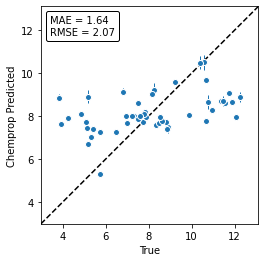

In [23]:
df = pd.read_csv('test_checkpoints_ensemble/fold_0/test_full.csv')
plot_parity(df.ea, preds_df.ea, preds_df.ea_epi_unc)

# Fingerprint

In [24]:
arguments = [
    '--test_path', '../data/regression.csv',
    '--preds_path', 'test_preds_fingerprint.csv',
    '--checkpoint_dir', 'test_checkpoints_reg',
    '--fingerprint_type', 'MPN'
]

args = chemprop.args.FingerprintArgs().parse_args(arguments)
preds = chemprop.train.molecule_fingerprint.molecule_fingerprint(args=args)

Loading training args


500it [00:00, 172434.80it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 500
Encoding smiles into a fingerprint vector from 1 models.
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:00<00:00,  1.40it/s] 


Saving predictions to test_preds_fingerprint.csv
Elapsed time = 0:00:01


In [25]:
preds.squeeze().shape

(500, 300)

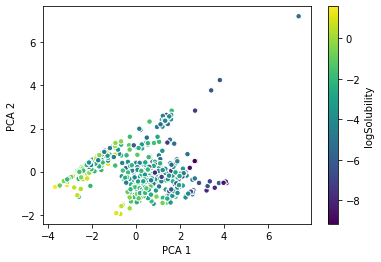

In [26]:
df = pd.read_csv('../data/regression.csv')

pca = PCA(n_components=2)
pca_xy = pca.fit_transform(preds.squeeze())
plt.scatter(pca_xy[:,0], pca_xy[:,1], s=30, c=df.logSolubility, edgecolor='w')
plt.colorbar(label='logSolubility')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# Spectra

In [27]:
arguments = [
    '--data_path', '../data/spectra.csv',
    '--dataset_type', 'spectra',
    '--save_dir', 'test_checkpoints_spectra',
    '--epochs', '5',
    '--features_path', '../data/spectra_features.csv',
    '--split_type', 'random_with_repeated_smiles',
    '--save_smiles_splits'
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)       

Command line
python /apps/share64/debian10/anaconda/anaconda-7/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/nanohub/bbishnoi/.local/share/jupyter/runtime/kernel-144bb3b1-09c8-49df-a882-eff23c0ec22e.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'alternative_loss_function': None,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': '../data/examples/spectra.csv',
 'data_weights_path': None,
 

In [28]:
arguments = [
    '--test_path', 'test_checkpoints_spectra/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_spectra.csv',
    '--checkpoint_dir', 'test_checkpoints_spectra',
    '--features_path', '../data/spectra_features.csv'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args


20it [00:00, 62742.02it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 20
Predicting with an ensemble of 1 models
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:00<00:00,  4.86it/s]
                                             
100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

Saving predictions to test_preds_spectra.csv
Elapsed time = 0:00:01


# Pretraining / Transfer Learning

In [29]:
arguments = [
    '--data_path', '../data/regression.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'test_checkpoints_transfer',
    '--epochs', '5',
    '--save_smiles_splits'
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)       

Command line
python /apps/share64/debian10/anaconda/anaconda-7/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/nanohub/bbishnoi/.local/share/jupyter/runtime/kernel-144bb3b1-09c8-49df-a882-eff23c0ec22e.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'alternative_loss_function': None,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': '../data/examples/regression.csv',
 'data_weights_path': None

In [30]:
arguments = [
    '--data_path', '../data/regression.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'test_checkpoints_transfer',
    '--epochs', '5',
    '--checkpoint_frzn', 'test_checkpoints_transfer/fold_0/model_0/model.pt'
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)       

Command line
python /apps/share64/debian10/anaconda/anaconda-7/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/nanohub/bbishnoi/.local/share/jupyter/runtime/kernel-144bb3b1-09c8-49df-a882-eff23c0ec22e.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'alternative_loss_function': None,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': 'test_checkpoints_transfer/fold_0/model_0/model.pt',
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': '../data/examp

Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".



 50%|█████     | 4/8 [00:00<00:00, 34.20it/s]
                                             
  0%|          | 0/1 [00:00<?, ?it/s]
                                     Validation rmse = 1.296603
 20%|██        | 1/5 [00:00<00:01,  2.84it/s]Epoch 1

  0%|          | 0/8 [00:00<?, ?it/s]Loss = 3.4136e-01, PNorm = 34.0886, GNorm = 2.8403, lr_0 = 7.1875e-04

 62%|██████▎   | 5/8 [00:00<00:00, 45.73it/s]
                                             
  0%|          | 0/1 [00:00<?, ?it/s]
                                     Validation rmse = 1.314916
 40%|████      | 2/5 [00:00<00:00,  3.70it/s]Epoch 2

  0%|          | 0/8 [00:00<?, ?it/s]Loss = 3.2333e-01, PNorm = 34.1106, GNorm = 2.2962, lr_0 = 6.1897e-04

 62%|██████▎   | 5/8 [00:00<00:00, 46.11it/s]
                                             
  0%|          | 0/1 [00:00<?, ?it/s]
                                     Validation rmse = 1.291808
 60%|██████    | 3/5 [00:00<00:00,  3.43it/s]Epoch 3

 50%|█████     | 4/8 [00:00<00:00, 29.3

In [31]:
arguments = [
    '--test_path', 'test_checkpoints_transfer/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_transfer.csv',
    '--checkpoint_dir', 'test_checkpoints_transfer',
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args


50it [00:00, 100970.25it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 50
Predicting with an ensemble of 1 models
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

Saving predictions to test_preds_transfer.csv
Elapsed time = 0:00:01
